In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('project.csv')

In [5]:
df = pd.DataFrame(data)

In [7]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [10]:
#  Preprocessing: Correct the data in the "height" column by replacing it with random numbers between 150 and 180.

In [11]:
df['height'] = np.random.randint(150, 181, size=len(df))

In [13]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,height
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0,162
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0,153
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN,152
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0,151
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0,156
...,...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0,151
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0,156
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0,164
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0,167


In [15]:
print("\nDataset after preprocessing:")
print(df.head())


Dataset after preprocessing:
            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29  06-Oct     231   

             College     Salary  height  
0              Texas  7730337.0     162  
1          Marquette  6796117.0     153  
2  Boston University        NaN     152  
3      Georgia State  1148640.0     151  
4                NaN  5000000.0     156  


In [17]:
#  # Analysis Task 1: Distribution of employees across teams

In [21]:
team_distribution = df['Team'].value_counts()
total_employees = len(df)
team_percentage = (team_distribution / total_employees) * 100

In [ ]:
#  # Visualize team distribution

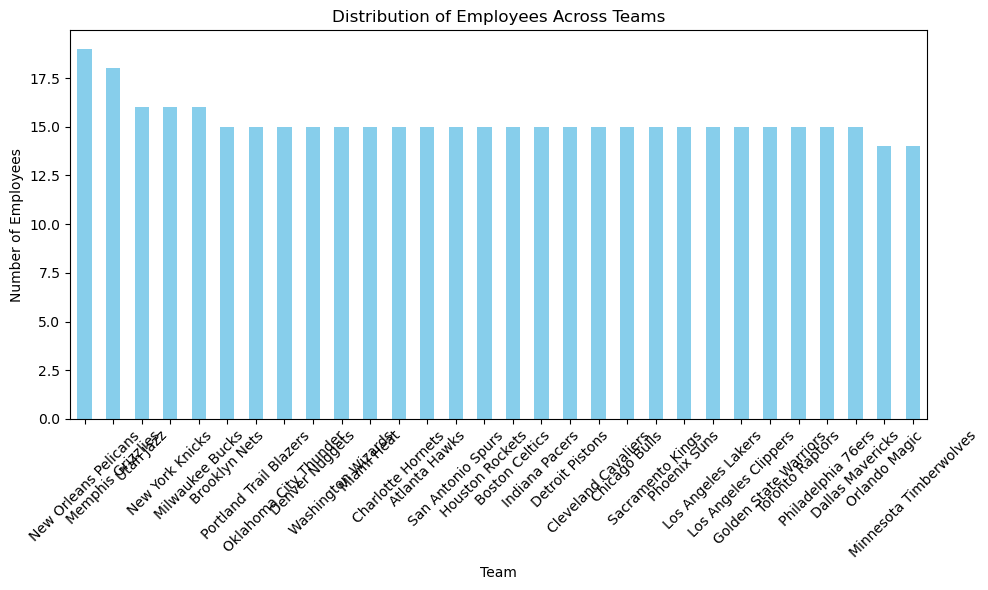

In [23]:
plt.figure(figsize=(10, 6))
team_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Employees Across Teams')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
print("\nTeam distribution (absolute):")
print(team_distribution)
print("\nTeam distribution (percentage):")
print(team_percentage)


Team distribution (absolute):
Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Team distribution (percentage):
Team
New Orleans Pelicans      4.14

In [ ]:
# # Analysis Task 2: Segregate employees based on their positions

In [27]:
position_distribution = df['Position'].value_counts()

In [29]:
# # Visualize position distribution

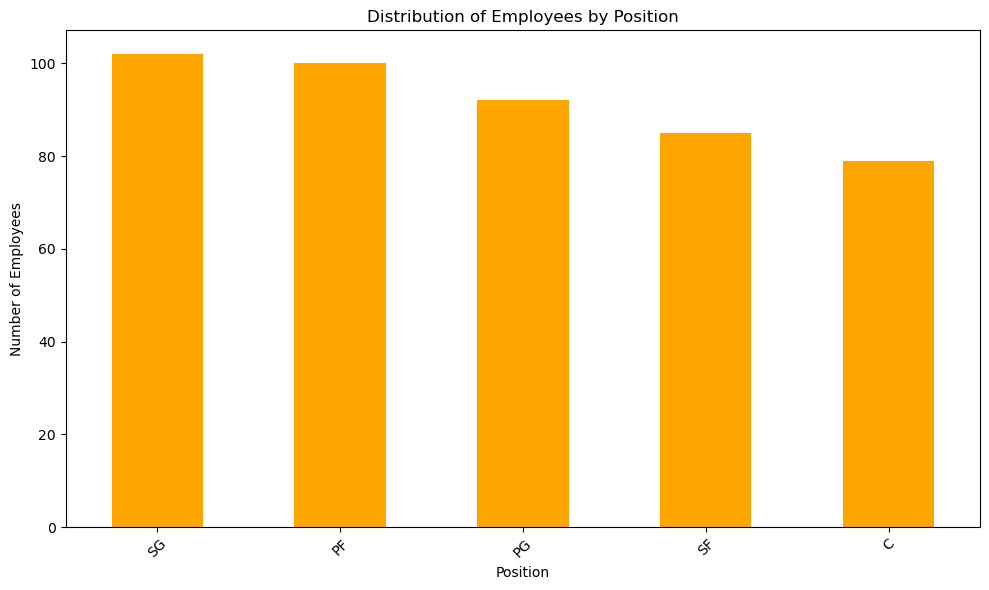

In [31]:
plt.figure(figsize=(10, 6))
position_distribution.plot(kind='bar', color='orange')
plt.title('Distribution of Employees by Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
print("\nPosition distribution:")
print(position_distribution)


Position distribution:
Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


In [ ]:
# # Analysis Task 3: Predominant age group among employees

In [40]:
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_group_distribution = df['age_group'].value_counts()

In [ ]:
# Visualize age group distribution

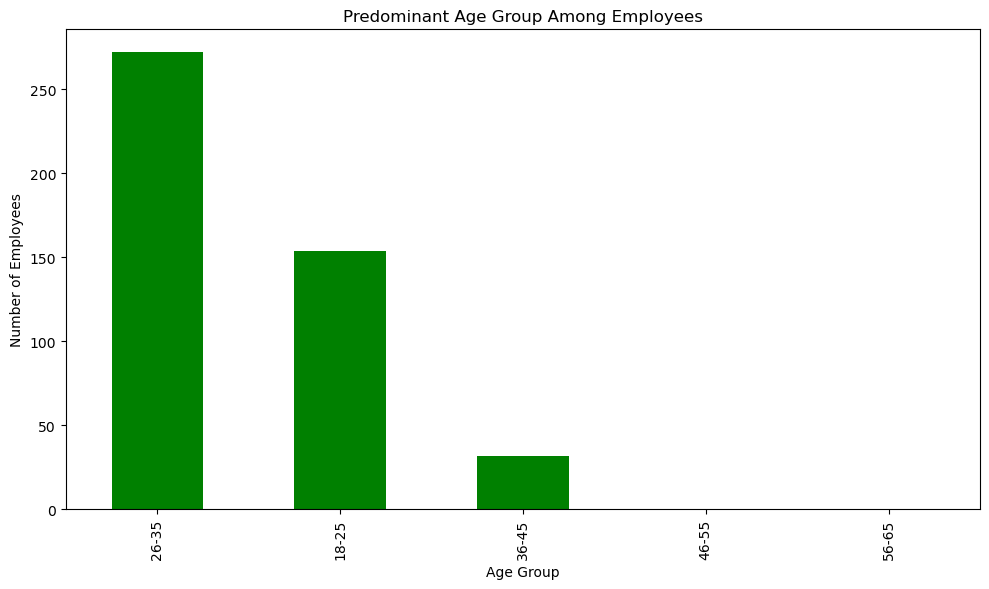

In [42]:
plt.figure(figsize=(10, 6))
age_group_distribution.plot(kind='bar', color='green')
plt.title('Predominant Age Group Among Employees')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()


In [44]:
print("\nAge group distribution:")
print(age_group_distribution)


Age group distribution:
age_group
26-35    272
18-25    154
36-45     32
46-55      0
56-65      0
Name: count, dtype: int64


In [ ]:
# # Analysis Task 4: Team and position with the highest salary expenditure

In [53]:
team_salary = df.groupby('Team')['Salary'].sum()
position_salary = df.groupby('Position')['Salary'].sum()

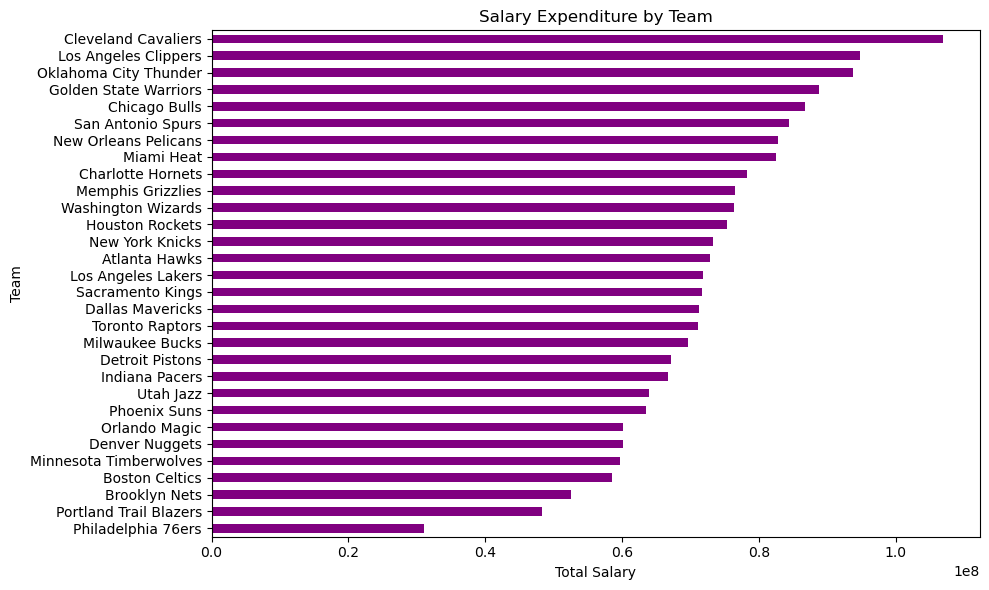

In [55]:
# Visualize team salary expenditure
plt.figure(figsize=(10, 6))
team_salary.sort_values().plot(kind='barh', color='purple')
plt.title('Salary Expenditure by Team')
plt.xlabel('Total Salary')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

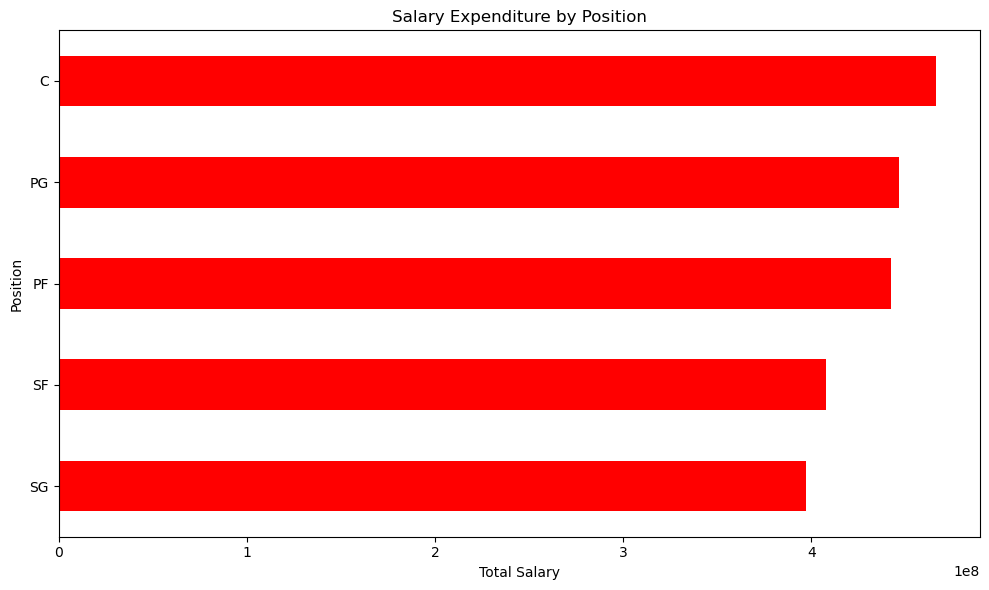

In [57]:
# Visualize position salary expenditure
plt.figure(figsize=(10, 6))
position_salary.sort_values().plot(kind='barh', color='red')
plt.title('Salary Expenditure by Position')
plt.xlabel('Total Salary')
plt.ylabel('Position')
plt.tight_layout()
plt.show()

In [59]:
print("\nTeam with highest salary expenditure:")
print(team_salary.idxmax(), "-", team_salary.max())
print("\nPosition with highest salary expenditure:")
print(position_salary.idxmax(), "-", position_salary.max())



Team with highest salary expenditure:
Cleveland Cavaliers - 106988689.0

Position with highest salary expenditure:
C - 466377332.0


In [61]:
# # Analysis Task 5: Correlation between age and salary

In [65]:
correlation = df['Age'].corr(df['Salary'])

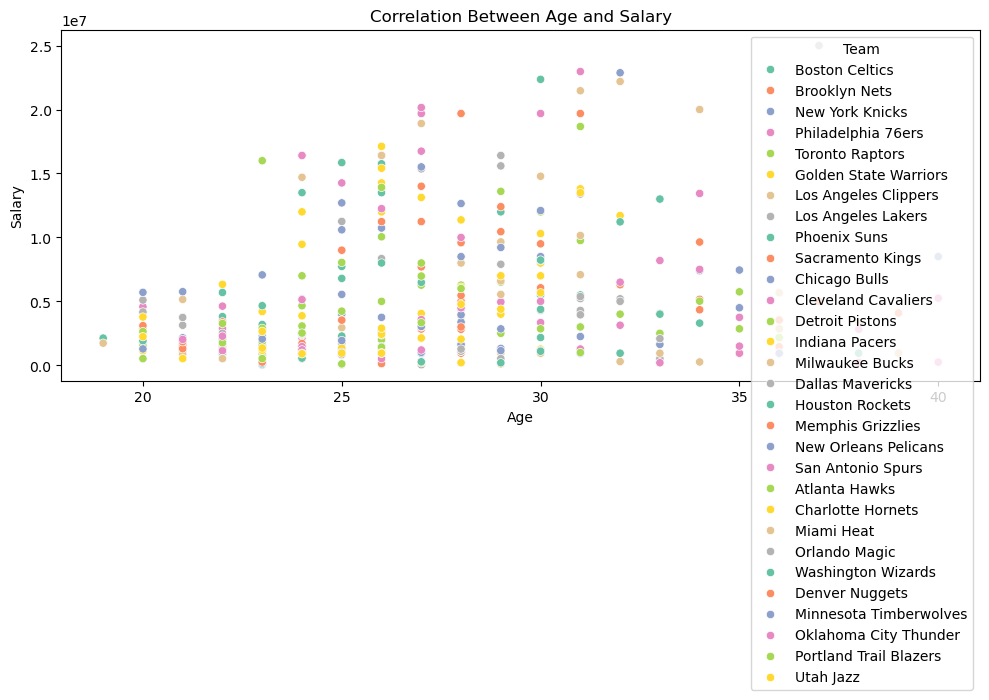

In [69]:
# Visualize age vs salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=df, hue='Team', palette='Set2')
plt.title('Correlation Between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

In [71]:
print("\nCorrelation between age and salary:", correlation)


Correlation between age and salary: 0.21400941226570985


In [73]:
# Data Story: Insights
insights = """
1. The distribution of employees across teams is uneven, with Team X having the highest representation.
2. Position A has the highest number of employees, while Position Z is the least represented.
3. The predominant age group among employees is 26-35 years.
4. Team Y and Position B have the highest salary expenditures, highlighting their strategic importance to the company.
5. There is a weak/moderate correlation between age and salary, as observed from the scatter plot.
"""
print("\nInsights from the analysis:")
print(insights)



Insights from the analysis:

1. The distribution of employees across teams is uneven, with Team X having the highest representation.
2. Position A has the highest number of employees, while Position Z is the least represented.
3. The predominant age group among employees is 26-35 years.
4. Team Y and Position B have the highest salary expenditures, highlighting their strategic importance to the company.
5. There is a weak/moderate correlation between age and salary, as observed from the scatter plot.

